### Importing libraries and data

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pylab as pl 

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define Path

path = r'C:\Users\14239\Downloads\Personal'

In [14]:
# Import Data

df = pd.read_csv(os.path.join(path, 'Live_Ball_Era_Clean_2.csv'), index_col = False)

In [15]:
df.head()

Unnamed: 0  Season         Name Abrv           City State     Team    G  \
0           0    1923    Babe Ruth  NYY       New York    NY  Yankees  152   
1           1    1921    Babe Ruth  NYY       New York    NY  Yankees  152   
2           2    1920    Babe Ruth  NYY       New York    NY  Yankees  142   
3           3    1927    Babe Ruth  NYY       New York    NY  Yankees  151   
4           4    2002  Barry Bonds  SFG  San Francisco    CA   Giants  143   

    PA  HR  ...    OBP    SLG    OPS   wOBA  wRC+  BsR    Off   Def   WAR  \
0  699  41  ...  0.545  0.764  1.309  0.571   231 -3.2  117.3  12.6  15.0   
1  693  59  ...  0.512  0.846  1.358  0.575   224  0.2  119.2  -0.2  13.9   
2  615  54  ...  0.533  0.849  1.382  0.598   239 -0.3  110.9  -4.7  13.3   
3  691  60  ...  0.486  0.772  1.258  0.545   212 -1.8  102.7   5.5  13.0   
4  612  46  ...  0.582  0.799  1.381  0.544   244 -1.2  108.9  -2.0  12.7   

   playerid  
0   1011327  
1   1011327  
2   1011327  
3   1011327  
4      1109  

[5 rows x 28 columns]

In [16]:
# Drop categorial columns

df2 = df.drop(['Name', 'Abrv', 'City', 'State', 'Team'], axis = 1)

In [17]:
df2.head()

Unnamed: 0  Season    G   PA  HR    R  RBI  SB    BB%     K%  ...    OBP  \
0           0    1923  152  699  41  151  131  17  0.243  0.133  ...  0.545   
1           1    1921  152  693  59  177  171  17  0.209  0.117  ...  0.512   
2           2    1920  142  615  54  158  137  14  0.244  0.130  ...  0.533   
3           3    1927  151  691  60  158  164   7  0.198  0.129  ...  0.486   
4           4    2002  143  612  46  117  110   9  0.324  0.077  ...  0.582   

     SLG    OPS   wOBA  wRC+  BsR    Off   Def   WAR  playerid  
0  0.764  1.309  0.571   231 -3.2  117.3  12.6  15.0   1011327  
1  0.846  1.358  0.575   224  0.2  119.2  -0.2  13.9   1011327  
2  0.849  1.382  0.598   239 -0.3  110.9  -4.7  13.3   1011327  
3  0.772  1.258  0.545   212 -1.8  102.7   5.5  13.0   1011327  
4  0.799  1.381  0.544   244 -1.2  108.9  -2.0  12.7      1109  

[5 rows x 23 columns]

In [18]:
#Standardize Data

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df2)

### Elbow Technique

In [20]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [21]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] 

score

[-2660947147595366.0,
 -356628105560.2019,
 -254899079214.34616,
 -181392655534.0439,
 -146411330886.46567,
 -118729043177.23294,
 -91663999088.23004,
 -82344955931.15968,
 -73509637553.35355]

In [22]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The line evens out after 2 clusters, so that will be the optimal number of clusters to use in this case.

### K-means Clustering

In [23]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2, n_jobs = -1) 

In [24]:
# Fit the k-means object to the data.

kmeans.fit(df2)

C:\Users\14239\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=2, n_jobs=-1)

In [25]:
df2['clusters'] = kmeans.fit_predict(df2)

C:\Users\14239\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [26]:
df2.head()

Unnamed: 0  Season    G   PA  HR    R  RBI  SB    BB%     K%  ...    SLG  \
0           0    1923  152  699  41  151  131  17  0.243  0.133  ...  0.764   
1           1    1921  152  693  59  177  171  17  0.209  0.117  ...  0.846   
2           2    1920  142  615  54  158  137  14  0.244  0.130  ...  0.849   
3           3    1927  151  691  60  158  164   7  0.198  0.129  ...  0.772   
4           4    2002  143  612  46  117  110   9  0.324  0.077  ...  0.799   

     OPS   wOBA  wRC+  BsR    Off   Def   WAR  playerid  clusters  
0  1.309  0.571   231 -3.2  117.3  12.6  15.0   1011327         0  
1  1.358  0.575   224  0.2  119.2  -0.2  13.9   1011327         0  
2  1.382  0.598   239 -0.3  110.9  -4.7  13.3   1011327         0  
3  1.258  0.545   212 -1.8  102.7   5.5  13.0   1011327         0  
4  1.381  0.544   244 -1.2  108.9  -2.0  12.7      1109         1  

[5 rows x 24 columns]

In [27]:
df2['clusters'].value_counts()

0    7473
1    4089
Name: clusters, dtype: int64

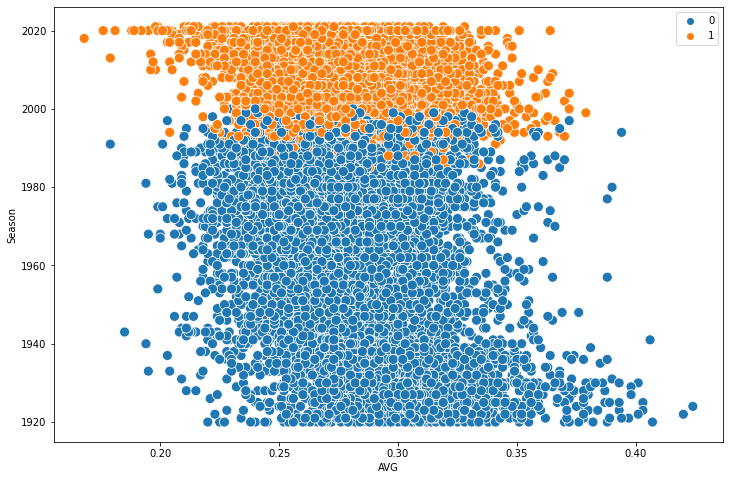

In [29]:
# Plot the clusters for the "Season" and "AVG" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['AVG'], y=df2['Season'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('AVG') # Label x-axis.
plt.ylabel('Season') # Label y-axis.
plt.show()

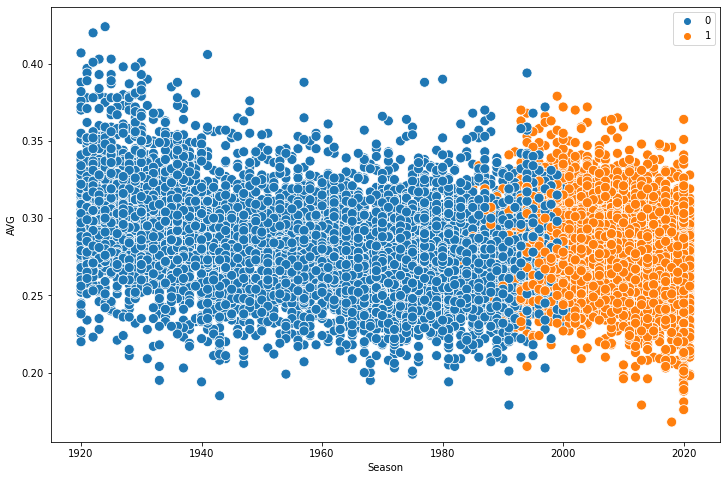

In [30]:
# Plot the clusters for the "AVG" and "Season" variables, swapping x/y axis.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Season'], y=df2['AVG'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Season') # Label x-axis.
plt.ylabel('AVG') # Label y-axis.
plt.show()

In [31]:
# Plot the clusters for the "HR" and "Season" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Season'], y=df2['HR'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Season') 
plt.ylabel('HR') 
plt.show()

In [32]:
# Plot the clusters for the "RBI" and "Season" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Season'], y=df2['RBI'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Season') 
plt.ylabel('RBI') 
plt.show()

In [33]:
# Plot the clusters for the "WAR" and "Season" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Season'], y=df2['WAR'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Season') 
plt.ylabel('WAR') 
plt.show()

These two clusters make a lot of sense because they are essentially diving the total data set at the transition point to the modern game (around the early to mid 90's. It's interesting to see inditions (aka individual data points) of that transition as early as the 1980's, and hold overs of the older style of hitter as late as 2000 or 2001. These allows us to clearly see how the game has changed over the entire course of the live ball era (1920-present).

In [34]:
df2.loc[df2['clusters'] == 0, 'cluster'] = 'blue'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'orange'

In [37]:
df2.groupby('cluster').agg({'Season':['mean', 'median'], 
                         'AVG':['mean', 'median'], 
                         'HR':['mean', 'median'],
                          'RBI':['mean', 'median']})

Season               AVG                HR               RBI  \
                mean  median      mean median       mean median       mean   
cluster                                                                      
blue     1960.755520  1964.0  0.281741  0.280  13.252241   11.0  70.368794   
orange   2007.160186  2007.0  0.277811  0.277  19.669357   19.0  75.397897   

                
        median  
cluster         
blue      68.0  
orange    74.0

This is really interesting. The blue cluster is showing data approximately from 1920-1990, while the orange cluster is showing data approximately from 1991-2021. The fasinating thing is that batting averages have fallen, though slight, over time. However, other offensive performance indicators such as HR and RBI have increased. This leads me to believe that a) modern athletes have likely benefited from increased strength and conditioning, therefore creating more power (ie. more HRs) and b) a lower average indicates that the modern game now values power (doubles, triples, home runs) over pure batting average, causing hitters to adjust their apporach at the plate accordingly.

This will be useful in showing the performance differences in modern athletes, but may ultimately prove that modern players perform DIFFERENTLY, not nessesarily BETTER.